# Cole Weber
## Week 15 - 5/1/2021
### Python Data Cleaning and Visualization Project - Stock market

In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv('AMZN-1.csv')
data.head(10)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon


In [5]:
data.tail(10)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
2232,11/13/2020,yahoo,3122.000000,3141.719971,3085.389893,3128.810059,3128.810059,3756200,amazon
2233,11/16/2020,yahoo,3093.199951,3142.699951,3072.689941,3131.060059,3131.060059,3808700,amazon
2234,11/17/2020,yahoo,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444700,amazon
2235,11/18/2020,yahoo,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916800,amazon
2236,11/19/2020,yahoo,3105.310059,3125.000000,3080.919922,3117.020020,3117.020020,3010300,amazon
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon
2241,11/27/2020,yahoo,3211.260010,3216.189941,3190.050049,3195.340088,3195.340088,2392900,amazon


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2241.000000,2240.000000,2242.000000,2239.000000,2241.000000,2.242000e+03
mean,991.401419,1002.190218,979.221717,991.895355,991.190696,4.118187e+06
std,802.269032,811.968123,790.843600,801.664757,801.654109,2.278888e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,0.000000e+00
25%,320.359985,323.687500,315.807487,321.385010,320.510010,2.688550e+06
50%,717.380005,723.394989,712.629975,719.299988,719.070007,3.528700e+06
75%,1660.000000,1679.964966,1633.707459,1661.830017,1660.510010,4.839800e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.385610e+07


In [17]:
data.columns

Index(['Date', 'Source', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2242 non-null   object 
 1   Source     2242 non-null   object 
 2   Open       2241 non-null   float64
 3   High       2240 non-null   float64
 4   Low        2242 non-null   float64
 5   Close      2239 non-null   float64
 6   Adj Close  2241 non-null   float64
 7   Volume     2242 non-null   int64  
 8   Stock      2242 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 157.8+ KB


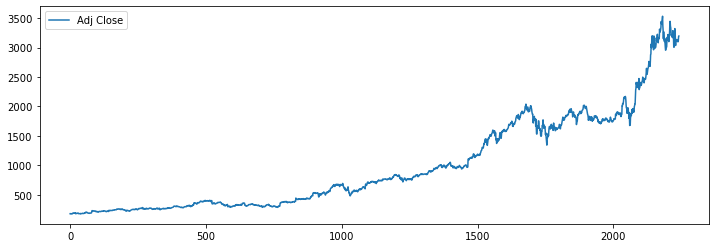

In [14]:
data['Adj Close'].plot(legend=True, figsize=(12,4))

In [18]:
# count the number of numerical and non-numerical columns
from pandas.api.types import is_numeric_dtype
n=0
for c in data.columns:
    if is_numeric_dtype(data[c]):
        n += 1
        
print("Numerical Columns:" , n, 'Non-Numerical Columns:',len(data.columns) - n)

Numerical Columns: 6 Non-Numerical Columns: 3


In [19]:
# Number of rows that have missing values
data.isnull().sum()

Date         0
Source       0
Open         1
High         2
Low          0
Close        3
Adj Close    1
Volume       0
Stock        0
dtype: int64

In [20]:
# Data cleaning to prepare data for analytics (Handlind missing value)
data.dropna(inplace=True) # Drops any rows containing null values

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2235 non-null   object 
 1   Source     2235 non-null   object 
 2   Open       2235 non-null   float64
 3   High       2235 non-null   float64
 4   Low        2235 non-null   float64
 5   Close      2235 non-null   float64
 6   Adj Close  2235 non-null   float64
 7   Volume     2235 non-null   int64  
 8   Stock      2235 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 174.6+ KB


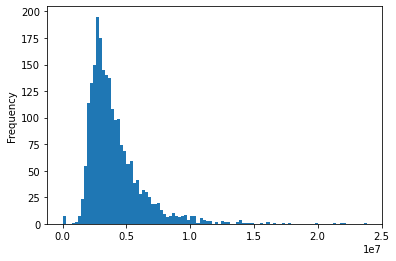

In [24]:
# Clean abnormal values
data['Volume'].plot(kind='hist', bins=100)

In [25]:
data['Volume'].min()

0

In [26]:
data['Volume'].max()

23856100

In [27]:
data['Volume'].sort_values(ascending=True).head(20)

29            0
114           1
18            5
161           6
47           23
90           25
66           78
2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
Name: Volume, dtype: int64